In [2]:
import numpy as np
import torch

# Data preprocessing

In [3]:
dir='../Question 3'

In [4]:
train_data=open(dir+'/train_data.txt','r')

In [5]:
train_data.readline()
lst=[]
for line in train_data.readlines():
    x1,x2,x3=line.split()
    tmp=[float(x1),float(x2),float(x3)]
    lst.append(tmp)

In [6]:
lst

[[0.8560556306099392, 0.277769973283011, 0.15232480464538567],
 [0.6183750378228392, 0.5211894701484203, 0.7868207929413954],
 [0.2640254184793873, 0.3690981824099311, 0.02940167624600054],
 [0.5015686207055655, 0.6740202412580624, 0.7618199425080885],
 [0.9462906392873235, 0.6122879007487733, 0.4688440784322583],
 [0.9727574537959657, 0.28773350240362394, 0.9283423530174263],
 [0.3849690947903128, 0.8139436971578943, 0.8322093086292379],
 [0.34090237344156393, 0.3049574520988412, 0.709727269721878],
 [0.688579676867796, 0.03177527850253914, 0.3566134753715897],
 [0.2053071186030181, 0.3710506117615243, 0.07143800224439267],
 [0.010761301592218886, 0.1200365655919109, 0.03477711184443799],
 [0.0031357551979777076, 0.030168252705060516, 0.3301902253832497],
 [0.16815086445899852, 0.35240351689623195, 0.5702068640649685],
 [0.1366953307621963, 0.8157364314813521, 0.5201342034094786],
 [0.6238799930374054, 0.21826684664890372, 0.7123839515387691],
 [0.6095276416274997, 0.913531974312172, 

In [7]:
train_label=open(dir+'/train_truth.txt','r')
train_label.readline()
lst_label=[]
for line in train_label.readlines():
    lst_label.append([float(line)])

In [8]:
tensor_data=torch.Tensor(lst)
tensor_label=torch.Tensor(lst_label)

In [9]:
print(tensor_data.shape,tensor_label.shape)

torch.Size([10000, 3]) torch.Size([10000, 1])


# network definition & training

In [10]:
net=torch.nn.Sequential(
    torch.nn.Linear(3,4),
    torch.nn.ReLU(),
    torch.nn.Linear(4,4),
    torch.nn.ReLU(),
    torch.nn.Linear(4,1))

In [11]:
loss_func=torch.nn.MSELoss()
losses=[]

optimizer=torch.optim.SGD(net.parameters(),lr=0.1)

In [12]:
for epoch in range(10000):
    prediction=net(tensor_data)
    loss=loss_func(prediction,tensor_label)
    
    if(epoch%100==0):
        losses.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

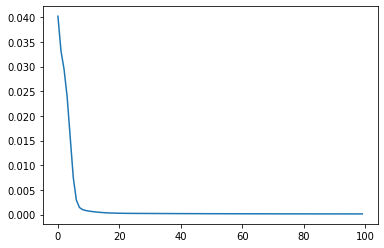

In [13]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [14]:
net(tensor_data)

tensor([[0.3976],
        [0.5485],
        [0.2687],
        ...,
        [0.4729],
        [0.2902],
        [0.4171]], grad_fn=<AddmmBackward>)

# testing data

In [15]:
test_data=open(dir+'/test_data.txt','r')

In [16]:
test_data.readline()
lst_test=[]
for line in test_data.readlines():
    x1,x2,x3=line.split()
    tmp=[float(x1),float(x2),float(x3)]
    lst_test.append(tmp)

# save result

In [26]:
a=net(torch.Tensor(lst_test)).detach().numpy()

In [30]:
x=a.tolist()

In [35]:
f=open('test_predicted.txt','w')
f.write('y\n')
for i in x:
    f.write(str(i[0]))
    f.write('\n')